## Multiple Logistic Regression

In [174]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [175]:
# Logistic Regression
# Initialize X,y,w,b

X = np.array([0,1,2,3,4,6])
y = np.array([0,0,1,0,1,1])
w = 2 
b = -3

In [176]:
# Predict y given X, w, b

def sigmoid(z):
	return (1/(1 + np.exp(-z)))

In [177]:
def predict_y(X,w,b):
	m = X.shape[0]
	y_probs = np.zeros(m)

	for i in range(m):
		y_probs[i] = sigmoid(w*X[i]+b)
	
	y_preds = np.where(y_probs >= 0.5, 1, 0)
	return y_preds, y_probs

In [178]:
y_preds, y_probs = predict_y(X,w,b)

In [179]:
y_preds, y_probs

(array([0, 0, 1, 1, 1, 1]),
 array([0.04742587, 0.26894142, 0.73105858, 0.95257413, 0.99330715,
        0.99987661]))

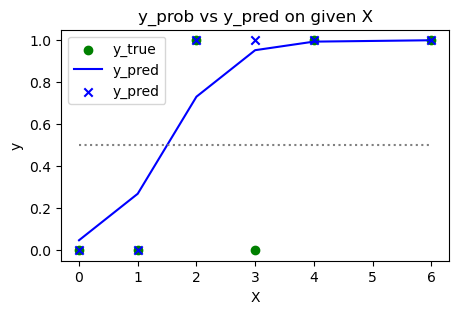

In [180]:
plt.figure(figsize=(5,3))
plt.scatter(X,y,color="g",label="y_true")
plt.plot(X,y_probs,color="b",label="y_pred")
plt.scatter(X,y_preds,color="b",label="y_pred", marker="x")
plt.plot([X.min(), X.max()], [0.5]*2, linestyle="dotted", color="grey")
plt.xlabel("X")
plt.ylabel("y")
plt.title("y_prob vs y_pred on given X")
plt.legend()


In [181]:
def cost(X,y,w,b, epsilon = 1e-5):
	y_preds, y_prob = predict_y(X,w,b)
	m = X.shape[0]
	cost = 0

	for i in range(m):
		log_loss = ((-y[i]*np.log(y_prob[i]+epsilon)) - ((1-y[i])*np.log((1-y_prob[i])+epsilon)))	#since log = 0 is undefined
		cost += log_loss

	return cost/m


In [182]:
def calc_cost(X,y,w,b, epsilon=1e-5):
	m = X.shape[0]
	cost = 0

	for i in range(m):
		z = w*X[i]+b
		f_wb = sigmoid(z)
		log_loss = ((-y[i]*np.log(f_wb + epsilon))-((1-y[i])*np.log(1-f_wb)+epsilon))
		cost += log_loss

	return cost/m
	

The calc_cost (v2) approach is superior because it integrates the prediction and cost calculation into a single loop.Reduced Overhead: By calculating the raw input ($z = w \cdot X[i] + b$), the probability ($\hat{y} = \text{sigmoid}(z)$), and the cost all inside the main for loop, you avoid the overhead of calling and returning from the predict_y function for every cost calculation iteration.Optimized Structure: When performing gradient descent, you only need the current cost; you don't need the final array of predictions ($\hat{y}$) until you want to evaluate the model's performance. Calculating cost one sample at a time is the most direct way to implement the formula.

In [183]:
cost(X,y,w,b)

0.6217113453317057

In [184]:
calc_cost(X,y,w,b)

0.6217405136081727

In [185]:
calc_cost(X,y,w-1,b)

0.42394198519056464

In [186]:
calc_cost(X,y,w-2,b)

1.5484719350025606

In [187]:
calc_cost(X,y,w+1,b)

1.132138462997413

In [188]:
calc_cost(X,y,w+2,b)

1.7280999972673083

In [189]:
calc_cost(X,y,w+3,b)

2.3627238342828814

In [190]:
# Gradient Descent
def calc_gradient(X,y,w,b):
	m = X.shape[0]
	dJ_db = 0
	dJ_dw = 0

	for i in range(m):
		dJ_dw += (sigmoid(w*X[i]+b) - y[i])*X[i]
		dJ_db += sigmoid(w*X[i]+b) - y[i]
	
	return dJ_dw/m, dJ_db/m

In [191]:
dJ_dw, dJ_db = calc_gradient(X,y,w,b)

In [192]:
dJ_dw, dJ_db

(0.426878197990708, 0.16553062574995486)

In [193]:
print(f"Initial w:{w}\tInitial b:{b}\tInitial Cost:{calc_cost(X,y,w,b)}")

print(f"dJ/dw={dJ_dw}\tdJ/db={dJ_db}")

alpha=0.01

w_new = w - alpha*dJ_dw
b_new = b - alpha*dJ_db
print(f"w_new={w_new}\tb_new={b_new}\tInitial Cost:{calc_cost(X,y,w_new,b_new)}")

Initial w:2	Initial b:-3	Initial Cost:0.6217405136081727
dJ/dw=0.426878197990708	dJ/db=0.16553062574995486
w_new=1.995731218020093	b_new=-3.0016553062574998	Initial Cost:0.619647537048092


In [194]:
def gradient_descent(x,y,w,b,alpha=0.01, iter=1000,step=100):
	history={}
	best_b = b
	best_w = w
	
	for i in range(iter):
		dJ_dw,dJ_db=calc_gradient(X,y,w,b)
		w = w - (alpha*dJ_dw)
		b = b - (alpha*dJ_db)

		if i % step == 0:
			cost = calc_cost(X,y,w,b)
			history[i] = cost
			min_cost = min(history.values())
			if cost < min_cost:
				best_w = w
				best_b = b
			print(f"Epoch:{i}\tw={w}\tb={b}\tCost:{cost}\tMin Cost:{min_cost}\tbest_w={best_w}\tbest_b={best_b}")

	return history,w,b,best_w,best_b

In [195]:
history,w,b,best_w,best_b = gradient_descent(X,y,w,b)

Epoch:0	w=1.995731218020093	b=-3.0016553062574998	Cost:0.619647537048092	Min Cost:0.619647537048092	best_w=2	best_b=-3
Epoch:100	w=1.6393624796273907	b=-3.1328898033284633	Cost:0.47360188975402223	Min Cost:0.47360188975402223	best_w=2	best_b=-3
Epoch:200	w=1.4274008133662524	b=-3.202084300020502	Cost:0.4222700193905391	Min Cost:0.4222700193905391	best_w=2	best_b=-3
Epoch:300	w=1.325875872101328	b=-3.2295848686630557	Cost:0.4106008073172253	Min Cost:0.4106008073172253	best_w=2	best_b=-3
Epoch:400	w=1.2832396332570366	b=-3.2364053151195886	Cost:0.408610238292717	Min Cost:0.408610238292717	best_w=2	best_b=-3
Epoch:500	w=1.2657578469573072	b=-3.2347510436507108	Cost:0.4082821375064931	Min Cost:0.4082821375064931	best_w=2	best_b=-3
Epoch:600	w=1.2579678013232503	b=-3.2299649150924283	Cost:0.40819578950431157	Min Cost:0.40819578950431157	best_w=2	best_b=-3
Epoch:700	w=1.2537724747737327	b=-3.224115756192357	Cost:0.4081436087261023	Min Cost:0.4081436087261023	best_w=2	best_b=-3
Epoch:800	w=1.

In [196]:
def plot_hist(history):
	plt.figure(figsize=(4,3))
	plt.plot(history.keys(), history.values())
	plt.title("Cost over iteration")
	plt.xlabel("Iteration")
	plt.ylabel("Cost")

In [197]:
print(history)

{0: 0.619647537048092, 100: 0.47360188975402223, 200: 0.4222700193905391, 300: 0.4106008073172253, 400: 0.408610238292717, 500: 0.4082821375064931, 600: 0.40819578950431157, 700: 0.4081436087261023, 800: 0.40809752701241625, 900: 0.40805381252206646}


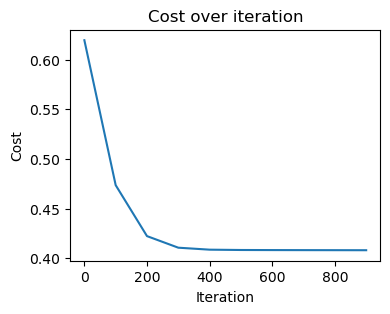

In [198]:
plot_hist(history)